In [1]:
import codecs
import re
import numpy as np
import matplotlib.pyplot as plt
import codecs
import pickle
import random

# On donne un identifiant à chaque lettre (A = 1)
def char_a_id(c):
    return 0 if c==" " else ord(c) - 64

#en entrant l'identifiant on recupere la lettre correspondante
def id_a_char(i):
    return " " if i==0 else chr(i+64)


def changerMotAvecNouvCode(s,code):
    res = ""
    for c in s:
        i = char_a_id(c)
        res += id_a_char(code[i])
    return res

def TransformeLaChaine(s):
    # Substitution "oe"
    s = re.sub(chr(338),"OE", s)
    s = re.sub(chr(339),"OE", s)
    
    # Remplacez les accents, transformez les signes de ponctuation en espace
    # En fin de compte, tout devrait être un espace (ascii 32) ou des majuscules A-Z (ascii 65-90)
    to_A = [192,224,226]
    to_C = [199,231]
    to_E = [200,201,202,232,233,234,235]
    to_I = [238,239]
    to_O = [244]
    to_U = [249,251,252]
    to_SPACE = list(range(33,65)) + [171,187,8217,8230,8211]
    
    s_sub = ""
    for c in s:
        c2 = c
        if(ord(c2) in range(97,123)):
            c2 = chr(ord(c2)-32)
        if ord(c2) in to_SPACE:
            c2 = " "
        if ord(c2) in to_A:
            c2 = "A"
        if ord(c2) in to_C:
            c2 = "C"
        if ord(c2) in to_E:
            c2 = "E"
        if ord(c2) in to_I:
            c2 = "I"
        if ord(c2) in to_O:
            c2 = "O"
        if ord(c2) in to_U:
            c2 = "U"  
        s_sub += c2
    
    #Supprimer espaces multiples
    res = re.sub('\s+',' ', s_sub)
    
    return res

def OuvertureEtMiseEnString(fichier):
    
    #Chargez le texte et faites-en une chaîne
    encoding = "utf-8"    
    text = ""
    with codecs.open(fichier, "r", encoding) as lines:
        for l in lines:
            # :-2 pour supprimer la ligne de fin puis concaténer
            text = text + l[:-2] + " " 
    
    return text

    
def calculeMotCorrect(s, dico):
    cnt = 0
    chaine = s.split(" ")
    for w in chaine:
        if w in dico:
            cnt +=1
    return cnt, len(chaine)

def scoreMotCorrect(s, dico):
    res = 0
    tot = 0
    chaine = s.split(" ")
    for w in chaine:
        if w in dico:
            res += len(w)
        tot += len(w)
    return res/tot


def find_wrong_words(s, dictionnary_words):
    word_list = s.split(" ")
    for w in word_list:
        if w not in dictionnary_words:
            print(w)
            
            
def frequenceLettre(s):
    res = np.zeros(26)          
    for i in range(26):
        res[i] = s.count(chr(65+i))
    return list(1 + np.argsort(res)[::-1])

def calculBigramme(text, outfile, imagefile = None):
    
    # Nombre de caractères ASCII pour vérifier que tout est ok
    count = np.zeros(10000)
    for c in text:
        count[ord(c)] += 1
        
    for i in range(10000):
        if count[i] > 10:
            print(str(i) + " " + chr(i) + " " + str(count[i]))
    
        
    # Nous sommes maintenant prêts à compter les bigrammes              
    bigrams = np.zeros((27,27),dtype='int32')
    i = 0
    for c in text:
        if count[ord(c)] > 10:
            j = 0 if c == " " else ord(c) - 64
            bigrams[i,j] += 1
            i = j

    bigrams.tofile(outfile)
    
    if imagefile != None:
        # graphique
        p2D=bigrams.astype('float')/np.tile(sum(bigrams.T),(27,1)).T
        p2D[np.isnan(p2D)] = 0
        
        alpha = 0.33
        p2Da = p2D**alpha
        plt.figure(figsize=(8,8))
        plt.imshow(p2Da,interpolation='nearest', cmap = 'cividis')
        plt.axis('off')
        
        for ip, i in enumerate([32]+list(range(65,91))):
            plt.text(-1,ip,chr(i),horizontalalignment='center',
                                    verticalalignment='center')
            plt.text(ip,-1,chr(i),horizontalalignment='center',
                                    verticalalignment='center')
        plt.savefig(imagefile)     
        
        return p2Da
        

def creationDico():
    #on recupere tout les mots de la langue francaise
    fichier = "liste.de.mots.francais.txt"
    
    #on va entrer le dictionnaire dans un chaine de caractere nomé dico
    dico = ""
    with codecs.open(fichier, "r", "utf-8") as lines:
        for l in  lines:
            dico += l[:-1] + " "
    #en supprimant tout les accents on obtient notre dictionnaire    
    dico = TransformeLaChaine(dico)
   
    # On change l'appostrophe après le Q
    words = ['QU'] + ['A','C','D','L','Y','M','N','S','T'] + dico.split(" ")
    
    #on va entrer tout ceci dans un fichier
    pickle.dump(words, open( "dictionnary.data", "wb" ))
    
    return dico

In [2]:
dico = creationDico()

32   93046.0
65 A 39397.0
66 B 3727.0
67 C 13474.0
68 D 15430.0
69 E 68057.0
70 F 4579.0
71 G 4136.0
72 H 4264.0
73 I 30683.0
74 J 2504.0
75 K 432.0
76 L 25612.0
77 M 11248.0
78 N 28848.0
79 O 21621.0
80 P 11732.0
81 Q 4343.0
82 R 27248.0
83 S 30281.0
84 T 29620.0
85 U 24875.0
86 V 6948.0
87 W 258.0
88 X 1486.0
89 Y 1406.0
90 Z 509.0


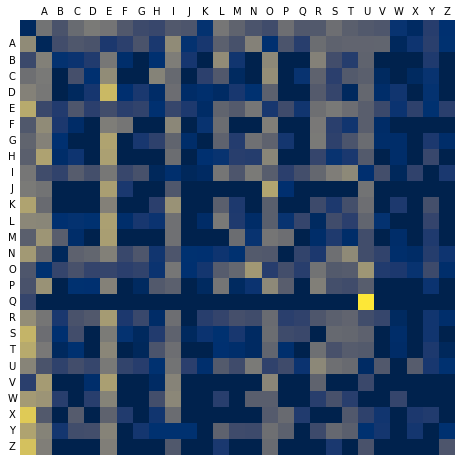

In [3]:
# creation bigramme
Comptage_bigram = True

livre = "Musso.txt"
bigramme_fichier = "bigrams.dat"


if Comptage_bigram:
    #on met tout dans une chaine de caractere
    text = OuvertureEtMiseEnString(livre)
    #on la transforme sans accents...
    text = TransformeLaChaine(text)
    #on calcule les probabilité qu'une lettre vienne après une autre
    calculBigramme(text, bigramme_fichier, "bigrams.png")

In [4]:
# Log vraisemblance par caractère calcule le score de plausibilité

#Comparer les differents facon de calculer le score de plausibilité

def scorePlausibilite(s):
    bigramme = np.fromfile(bigramme_fichier,dtype="int32").reshape(27,27)
    p=bigramme.astype('float')/np.tile(sum(bigramme.T),(27,1)).T
    p[np.isnan(p)] = 0
    EPSILON = 1e-6
    logp = np.log(p + EPSILON)
    
    #logp = np.log(p * p)
    
    res = 0
    c1 = s[0]
    for c2 in s[1:]:
        i = char_a_id(c1)
        j = char_a_id(c2)
        res += logp[i,j]
        c1 = c2
        
    return res/len(s)

# Appliquer une permutation à un code
def permutationCode(code,i,j):
    newcode = code.copy()
    newcode[j] = code[i]
    newcode[i] = code[j]
    return newcode


# Texte pour calculer la fréquence de la lettre pour l'estimation initiale
freq_text = TransformeLaChaine(OuvertureEtMiseEnString("Musso.txt"))

#text_cripter = "NASJX OXH NXH SOE BXYA SJXEA PY SNXYZEA ! YH ZASJSEG BSP ZAEJESG, RSA G SP ZY JY ? OS BAXBXPEZEXH EHRGYZ GS DEPBSAEZEXH, P'SKKASHRUEPPSHZ D'YH SZZAENYZ BSAOE JEHTZ-PEM. BSP RXH ! (XYE C'SE KSEZ KXAZ) JXEGS QYE PSHP PXYBRXH PSYAS ASJEA ZXH RENXYGXZ, XY DY OXEHP ZXH SAZ DY BLZUXH. SY BGSEPEA D'YH CXYA HXYP JXEA SYZXYA D'YH NXRV XY DY KGSRXH D'YH JEH, QY'EG PXEZ NGSHR XY AYNEP. ZXH JEG SOE"
text_cripter = "BKSMAMZCZMTFY KF OKATOCFZ ZHKY CYZIAMKIYKUKFZ AK UKYYCLK ATOK RTIY CRKP BHCFADM IF XCY OKAMYMB RKHY SC YTSIZMTF BMFCSK OCFY AKZZK CAZMRMZK UCZDKUCZMGIK CI SCX"

In [5]:
#Creation message chiffrer aléatoire

#s = "Je vous conseille de contacter mon collègue Elie, en copie de ce mail, qui vous répondra sur toutes les questions concernant la bourse de la Région."
#print(len(s))

#s = TransformeLaChaine(s)
#print(len(s))

#alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
#alphabet1 = "ABCDEFGHIJKLMNOPQRSTUVWXYZ "
#print(len(alphabet))
#print(len(alphabet1))

#code = ''.join(random.sample(alphabet,len(alphabet)))
#print("code : ",code)
#print(len(code))

#codeid = []
#for c in code:
    #a = char_a_id(c)
    #codeid.append(a)
    
#print("codeid : ", codeid)
#print(len(codeid))

#text_cripter = changerMotAvecNouvCode(s,codeid)
#print("text_cripter :", text_cripter)
#print(len(text_cripter))


In [ ]:
#on enleve accent... à notre message codé
text_cripter = TransformeLaChaine(text_cripter)

print(text_cripter + " Score de plausibilité : {0:.2f}".format(scorePlausibilite(text_cripter)))
print("\n")

# Conjecture initiale à partir de la fréquence de chacune des lettres
#celui du texte
ref_freq = frequenceLettre(freq_text)
#celui de la phrase chiffrer
obs_freq = frequenceLettre(text_cripter)


freq_code = [0] + list(range(1,27))

for i in range(1,27):
    pos = obs_freq.index(i)
    freq_code[i] = ref_freq[pos]

code = freq_code.copy()
trad = changerMotAvecNouvCode(text_cripter, code)
score = scorePlausibilite(trad)




# Meilleur resultat trouvé jusqu'à présent
best_code = code.copy()
best_score = score
best_trad = trad

#print(best_trad + "    N=" + str(0) + " L={0:.2f}".format(best_like))


#Algorithme de Metropolis
MIN_ITER = 2000
MAX_ITER = 100000
#On decide du score de plausibilite que l'on veut atteindre
THRESHOLD = -2.05
ALPHA = 1

ki = []
Li = []
for k in range(MAX_ITER):
    
    # Construire un mélange provisoire
    i = np.random.randint(1,27)
    j = np.random.randint(1,27)
    tt_code = permutationCode(code, i, j)
    
    tt_trad = changerMotAvecNouvCode(text_cripter, tt_code)
    tt_score = scorePlausibilite(tt_trad)
    
    # Tester si le déplacement doit être accepté
    x = np.random.rand()
    p = np.exp(ALPHA*(tt_score - score) * len(text_cripter))
    
    if(x < p):    
        code = tt_code.copy()
        trad = tt_trad
        score = tt_score
        #print("ACCEPT")
        
        if(score > best_score):
            best_code = code.copy()
            best_score = score
            best_trad = trad     
            print(best_trad + "    [k=" + str(k) + " L={0:.2f}]".format(best_score))
    Li.append(best_score)
    ki.append(k)
    if k > MIN_ITER and best_score > THRESHOLD:
        break

plt.plot(ki,Li)
plt.plot()

BKSMAMZCZMTFY KF OKATOCFZ ZHKY CYZIAMKIYKUKFZ AK UKYYCLK ATOK RTIY CRKP BHCFADM IF XCY OKAMYMB RKHY SC YTSIZMTF BMFCSK OCFY AKZZK CAZMRMZK UCZDKUCZMGIK CI SCX Score de plausibilité : -6.31


CEPTNTIAITURS ER DENUDARI IVES ASILNTELSEGERI NE GESSAHE NUDE MULS AMEW CVARNFT LR QAS DENTSTC MEVS PA SUPLITUR CTRAPE DARS NEIIE ANITMTIE GAIFEGAITBLE AL PAQ    [k=13 L=-3.05]
CEPINITATIURS ER DENUDART TYES ASTLNIELSEGERT NE GESSAHE NUDE MULS AMEW CYARNFI LR QAS DENISIC MEYS PA SUPLTIUR CIRAPE DARS NETTE ANTIMITE GATFEGATIBLE AL PAQ    [k=15 L=-2.95]
CEPINITUTIARS ER DENADURT TYES USTLNIELSEGERT NE GESSUHE NADE MALS UMEW CYURNFI LR QUS DENISIC MEYS PU SAPLTIAR CIRUPE DURS NETTE UNTIMITE GUTFEGUTIBLE UL PUQ    [k=28 L=-2.90]
CEPINISUSIART ER DENADURS SYET UTSLNIELTEGERS NE GETTUHE NADE MALT UMEW CYURNFI LR QUT DENITIC MEYT PU TAPLSIAR CIRUPE DURT NESSE UNSIMISE GUSFEGUSIBLE UL PUQ    [k=29 L=-2.90]
CEPINISUSIART ER DENADURS SYET UTSLNIELTEGERS NE GETTUHE NADE MALT UMEX CYURNFI LR QUT DENITIC MEYT P

In [ ]:
print(best_trad)

In [ ]:
print("\nEnter second phase")      


with open('dictionnary.data', 'rb') as filehandle:
    dictionnary_words = pickle.load(filehandle)          

cnt, total = calculeMotCorrect(trad, dico) 
word_score = scoreMotCorrect(trad, dico)

print("Mots OK "+str(cnt)+"/"+str(total)+" score="+ str(word_score))     

GAMMA = 4.0
best_score2 = GAMMA * word_score + best_score



code = best_code
score2 = best_score2
trad = best_trad

NITER2 = 2000
temperature = 0.05
rho = 0.999

for k in range(NITER2):
    
    # Build a tentative move and compute score
    i = np.random.randint(1,27)
    j = np.random.randint(1,27)
    tt_code = permutationCode(code, i, j)    
    tt_trad = changerMotAvecNouvCode(text_cripter, tt_code)    
    tt_word_score = scoreMotCorrect(tt_trad, dico)
    tt_score = scorePlausibilite(tt_trad)
    tt_score2 = GAMMA * tt_word_score + tt_score
    

    # Test whether move should be accepted    
    x = np.random.rand()
    p = np.exp((tt_score-score)/temperature)
    temperature = temperature * rho
    
    if(x < p):        
        code = tt_code.copy()
        trad = tt_trad
        score2 = tt_score2
        
        if(score2 > best_score2):
            best_code = code
            best_score2 = score2
            best_trad = trad
            print(tt_trad + "  W={0:.2f}  L={1:.2f} S={2:.2f} T={3:.3f} k={4}".format(tt_word_score, tt_score, tt_score2,temperature,k))

In [ ]:
print(best_trad)

In [ ]:
New_alphabet = []
for i in range(1,27):
    New_alphabet.append((chr(best_code[i]+64)))   

print(New_alphabet)